In [212]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
import numpy as np
from matplotlib import pyplot as plt
from agents.pgp.pgp_softmax import SoftMaxPGP
from environments.gridworlds.gridworlds_classic import *
from environments.gridworlds.gridworlds_toroidal import *
from environments.gridworlds.gridactions import *
from plots.gridworlds.gridworld_visualizer import GridWorldVisualizer
from utils.policy_functions import *

In [214]:
# Agent parameters
gamma = 0.99
p0 = p0_onehot

# World parameters
action_cost = -0.1

# Initialize world and agent
# world = TorusWorld(20, 20, np.array([[(20-1) // 2, (20-1) // 2]]), term_locs= np.array([]), action_cost=action_cost)
# world = TwoRooms(term_locs= np.array([]), action_cost=action_cost)
# world = FourRoom(n_square=10, term_locs= np.array([]), reward=np.array([]), action_cost=action_cost)
world = FourRoom2Goals()
# world = TwoRooms()

gpp = SoftMaxPGP(world, gamma, p0_func=p0)
viz = GridWorldVisualizer(world, gpp)

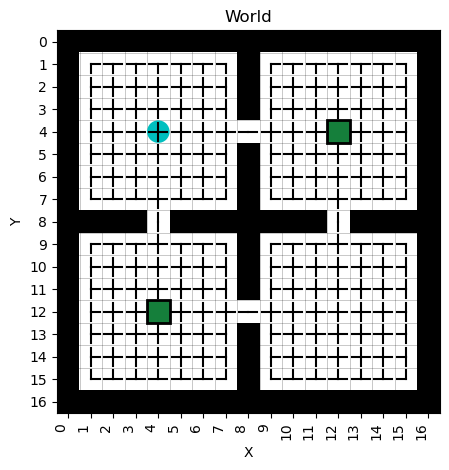

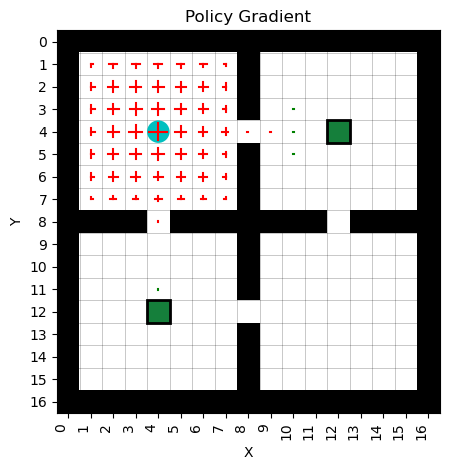

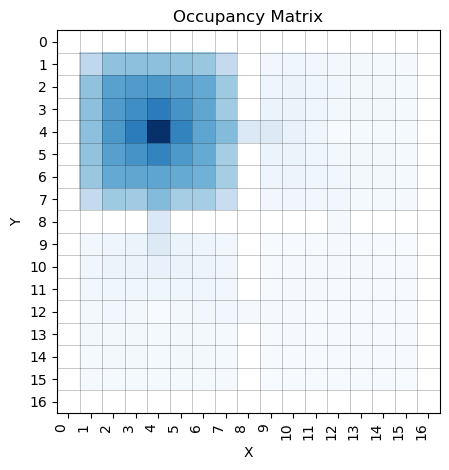

In [215]:
# Plot world
viz.plot_policy()
plt.title("World")
plt.tight_layout()
plt.show()

viz.plot_gradient(policy_gradient=True)
plt.title("Policy Gradient")
plt.tight_layout()
plt.show()

viz.plot_successor_matrix()
plt.title("Occupancy Matrix")
plt.tight_layout()
plt.show()


In [216]:
def SR2(agent):

    γ = agent.gamma
    D = agent.SR
    P = agent.env.P
    R = np.einsum("ij, ijk, ijk -> i", agent.policy_vec(), agent.env.P, agent.env.R)

    # dSR = Σ_oy  p_o ⋅ γ ⋅ D_oi ⋅ P_ijy ⋅ D_ys
    dSR = γ * np.einsum('oi, ijy, ys, s -> oij', D, P, D, R, optimize='optimal')
    dSR = np.sum(dSR, axis=2)
    dSR = dSR / np.sum(dSR, axis=1) 

    return dSR

In [217]:
def plot_eigenvalues(M, n_eig=10, interpolation="gaussian"):
    eigv_G, eigw_G = np.linalg.eig(M)

    idx = np.argsort(-eigv_G)[:n_eig]
    
    for n, i_eig in enumerate(idx):
        print("{}° Eigen Value = {}".format(n + 1, eigv_G[i_eig]))
        wr = eigw_G[:, i_eig].real
        wi = eigw_G[:, i_eig].imag
        plt.subplot(121)
        viz.plot_grid(wr, plot_axis=False, cmap='seismic', interpolation=interpolation, vmin=-np.max(np.abs(wr)), vmax=np.max(np.abs(wr)))
        plt.axis('off')
        plt.title("real eigVec")
        plt.subplot(122)
        viz.plot_grid(wi, plot_axis=False, cmap='seismic', interpolation=interpolation, vmin=-np.max(np.abs(wi)), vmax=np.max(np.abs(wi)))
        plt.axis('off')
        plt.title("img eigVec")
        plt.tight_layout()
        plt.show()

In [218]:
def plot_fiedler_vector(M, interpolation="gaussian"):
    eigv_G, eigw_G = np.linalg.eig(M)

    fiedler_idx = np.argsort(-eigv_G)[1]
    wr = eigw_G[:, fiedler_idx].real

    print("Fiedler Eigen Value = {}".format(eigv_G[fiedler_idx]))
    viz.plot_grid(wr, plot_axis=False, cmap='jet', interpolation=interpolation)
    plt.axis('off')
    plt.title("real eigVec")

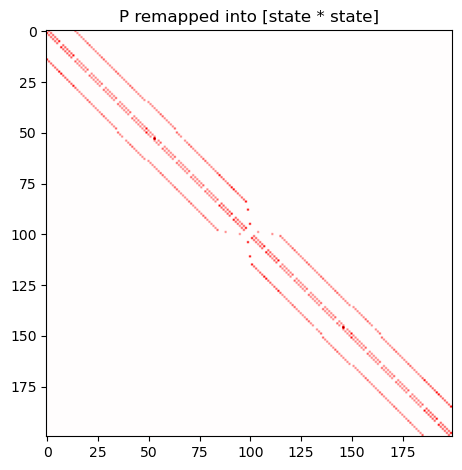

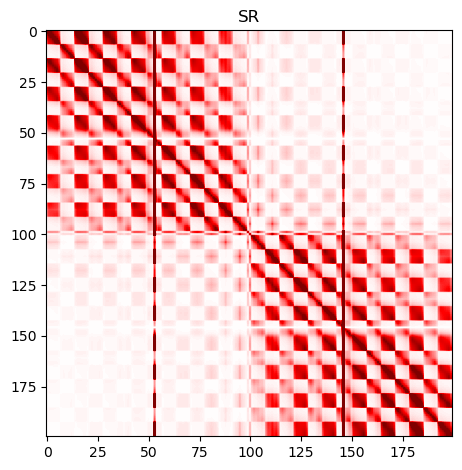

Fiedler Eigen Value = (99.99999999999895+0j)


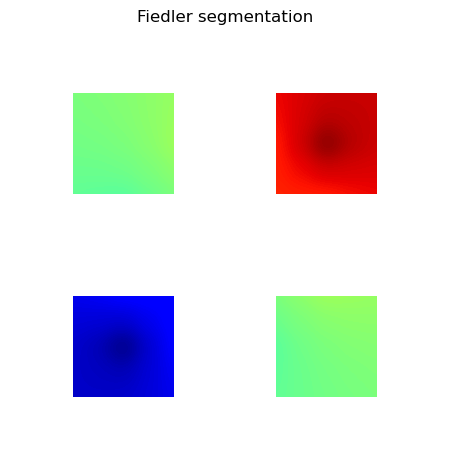

In [219]:
# Compute the gradient
gpp.reset()
sr2 = SR2(gpp)
sr = gpp.SR

# Sum over actions and normalize
P_s2s = np.sum(world.P, axis=1)
P_s2s = P_s2s / np.sum(P_s2s, axis=1) 

plt.imshow(P_s2s, cmap='seismic', vmin=-np.max(np.abs(P_s2s)), vmax=np.max(np.abs(P_s2s)))
plt.title("P remapped into [state * state]")
plt.tight_layout()
plt.show()

plt.imshow(sr, cmap='seismic', vmin=-np.max(np.abs(sr2)), vmax=np.max(np.abs(sr2)))
plt.title("SR")
plt.tight_layout()
plt.show()

plot_fiedler_vector(sr)
plt.title("Fiedler segmentation")
plt.tight_layout()
plt.show()

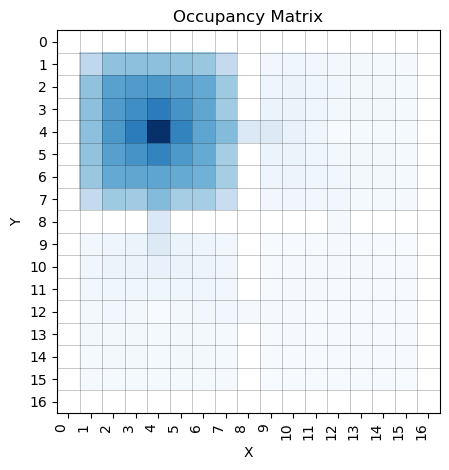

Fiedler Eigen Value = (99.99999999999895+0j)


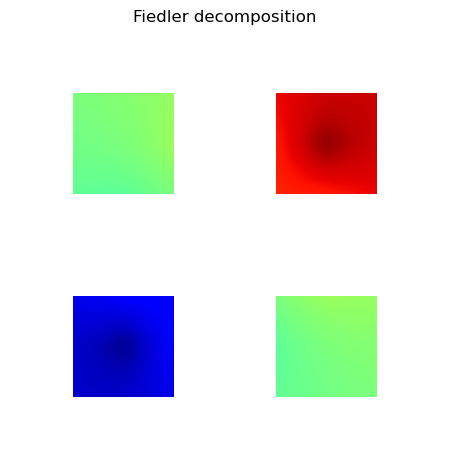

100%|██████████| 500/500 [00:01<00:00, 404.28it/s]


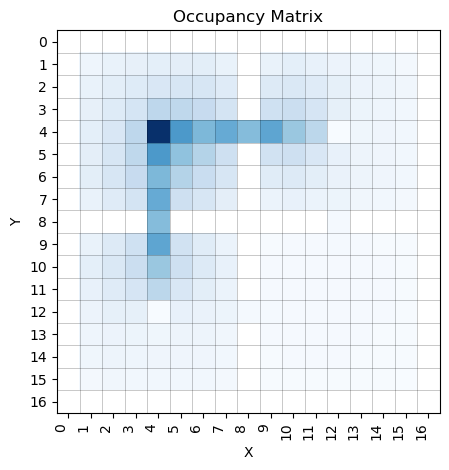

Fiedler Eigen Value = (100.00000000000009+0j)


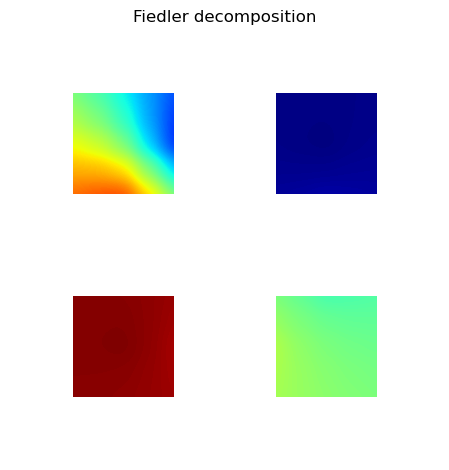

100%|██████████| 500/500 [00:01<00:00, 404.31it/s]


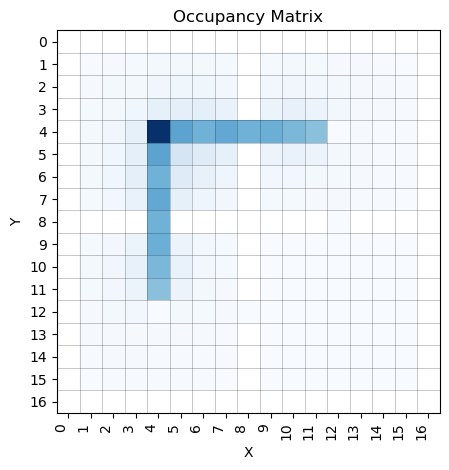

Fiedler Eigen Value = (99.99999999999962+0j)


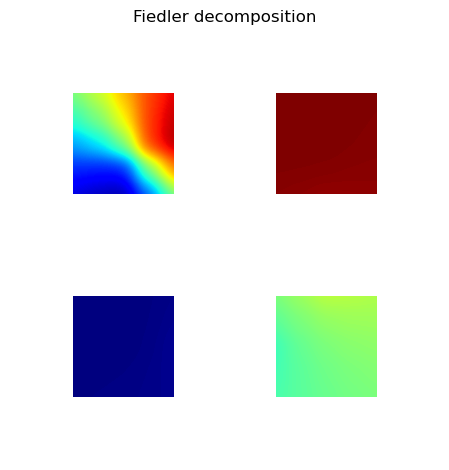

100%|██████████| 500/500 [00:01<00:00, 391.51it/s]


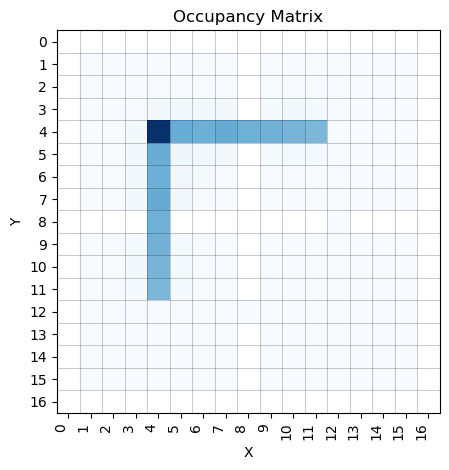

Fiedler Eigen Value = (100.00000000000031+0j)


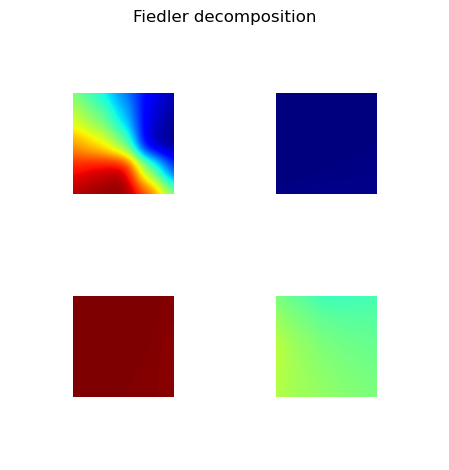

100%|██████████| 500/500 [00:01<00:00, 357.55it/s]


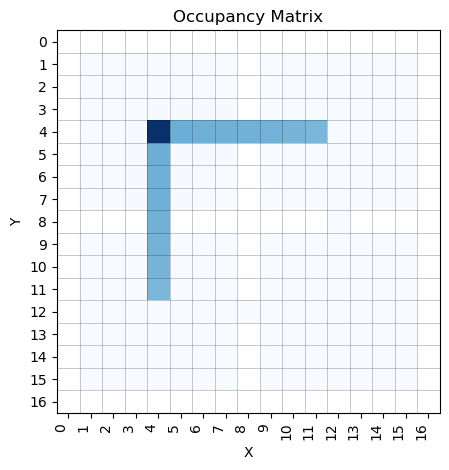

Fiedler Eigen Value = (99.99999999999946+0j)


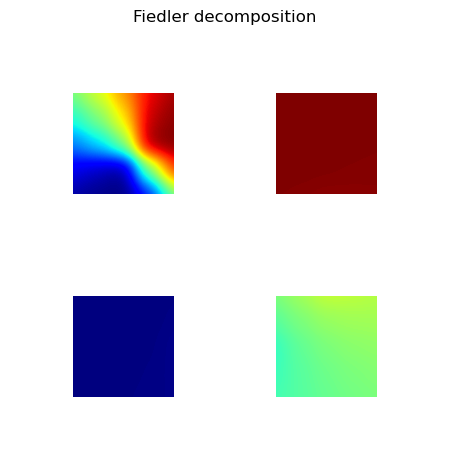

100%|██████████| 500/500 [00:01<00:00, 389.61it/s]


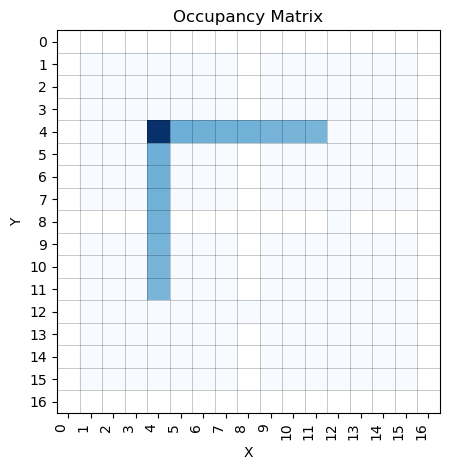

Fiedler Eigen Value = (100.00000000000054+0j)


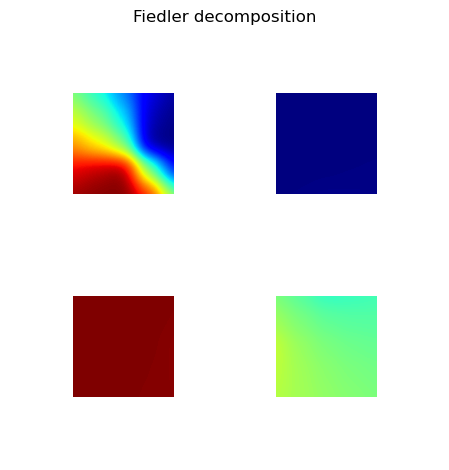

100%|██████████| 500/500 [00:01<00:00, 378.67it/s]


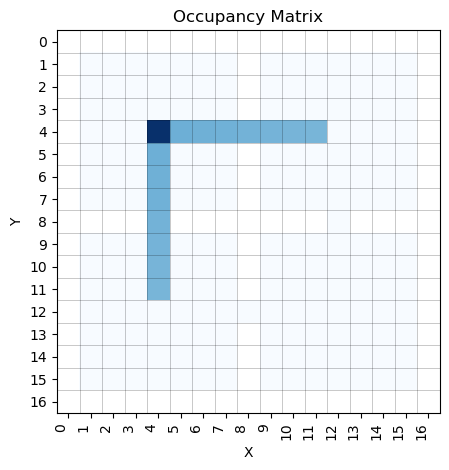

Fiedler Eigen Value = (99.99999999999847+0j)


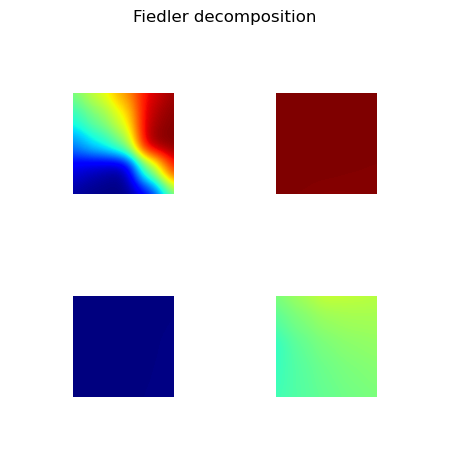

100%|██████████| 500/500 [00:01<00:00, 363.07it/s]


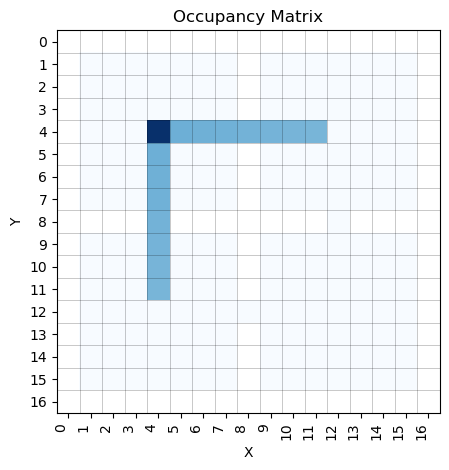

Fiedler Eigen Value = (99.99999999999949+0j)


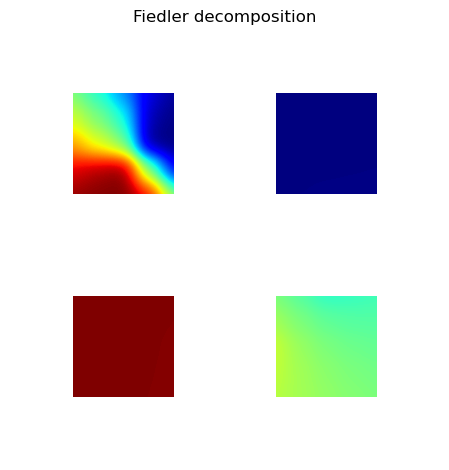

100%|██████████| 500/500 [00:01<00:00, 379.77it/s]


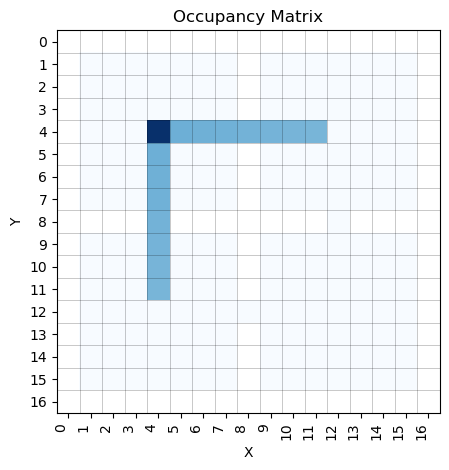

Fiedler Eigen Value = (99.99999999999854+0j)


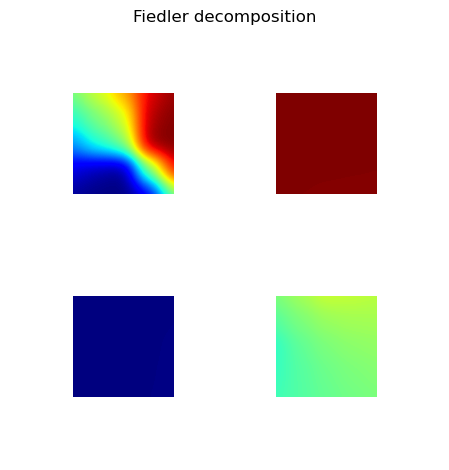

100%|██████████| 500/500 [00:01<00:00, 388.86it/s]


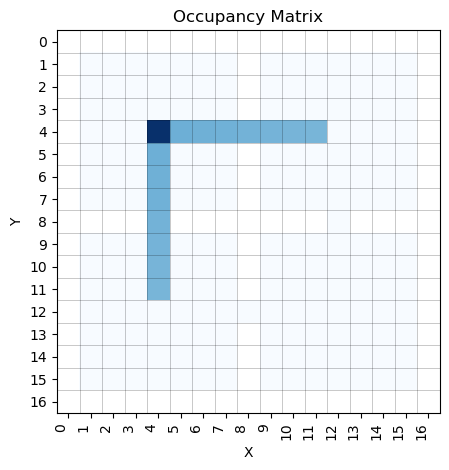

Fiedler Eigen Value = (99.99999999999959+0j)


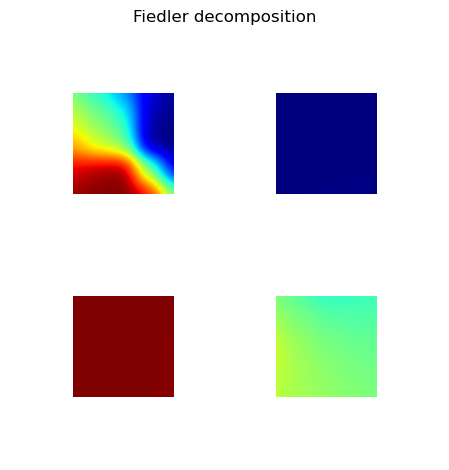

100%|██████████| 500/500 [00:01<00:00, 393.37it/s]


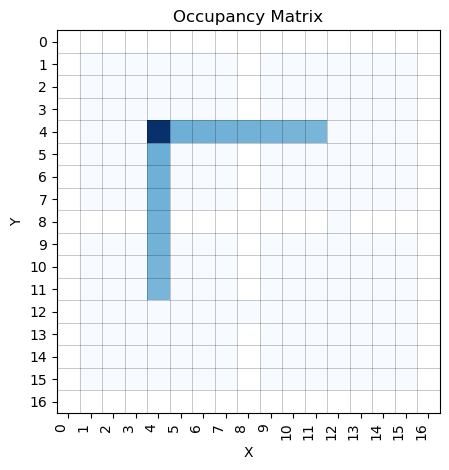

Fiedler Eigen Value = (99.99999999999977-4.2703559305768744e-13j)


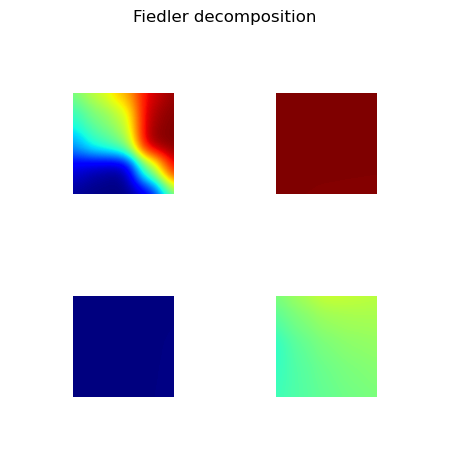

In [220]:
# Plot the eigen vectors
gpp.reset()

viz.plot_successor_matrix()
plt.title("Occupancy Matrix")
plt.tight_layout()
plt.show()

plot_fiedler_vector(sr)
plt.title("Fiedler decomposition")
plt.tight_layout()
plt.show()

for i in range(10):
    gpp.learn(n_steps=500, alpha=0.01)
    sr = gpp.SR

    viz.plot_successor_matrix()
    plt.title("Occupancy Matrix")
    plt.tight_layout()
    plt.show()

    plot_fiedler_vector(sr)
    plt.title("Fiedler decomposition")
    plt.tight_layout()
    plt.show()

